# Paso 1: Configuración de Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Paso 2: Importar bibliotecas y cargar datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta al archivo CSV en tu Google Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/Datasets/netflix_titles.csv"

# Cargar datos en un DataFrame
netflix_data = pd.read_csv(file_path)


# Paso 3: Exploración de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


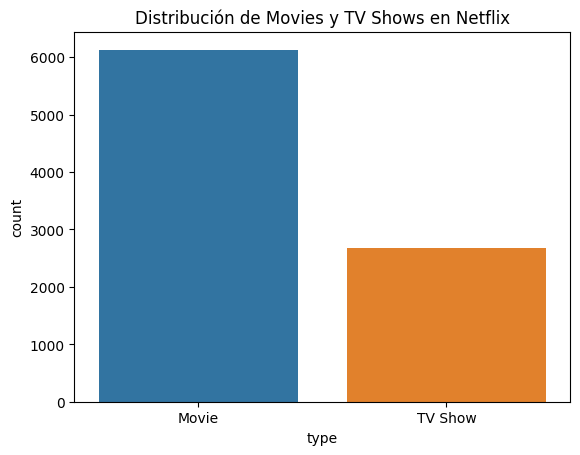

In [3]:
# Visualizar las primeras filas del DataFrame
netflix_data.head()

# Información general sobre el conjunto de datos
netflix_data.info()

# Estadísticas descriptivas
netflix_data.describe()

# Visualizar la distribución de tipos de contenido (Movies/TV Shows)
sns.countplot(x='type', data=netflix_data)
plt.title('Distribución de Movies y TV Shows en Netflix')
plt.show()


# Paso 4: Preprocesamiento de datos

In [5]:
df = pd.read_csv(file_path)
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [6]:
print(df.describe())

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [7]:
netflix_data_cleaned = netflix_data.dropna()

# Paso 5: Crear el sistema de recomendación basado en contenido

In [10]:
def get_recommendations_by_user():
    # Pedir al usuario que ingrese el título de la película/serie
    user_input = input("Ingrese el título de la película o serie que está buscando: ")

    # Buscar el índice de la película/serie
    indices = netflix_data.index[netflix_data['title'] == user_input].tolist()

    # Verificar si se encontraron resultados
    if not indices:
        print(f'No se encontró ninguna película o serie con el título "{user_input}"')
        return

    # Tomar el primer índice (puede haber múltiples coincidencias, tomamos la primera)
    idx = indices[0]

    # Calcular similitud de coseno entre descripciones
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Excluir la propia película/serie
    movie_indices = [i[0] for i in sim_scores]

    # Devolver títulos recomendados
    recommended_titles = netflix_data['title'].iloc[movie_indices]

    print(f'\nRecomendaciones para "{user_input}":')
    for i, title in enumerate(recommended_titles, start=1):
        print(f"{i}. {title}")

# Llamar a la función para obtener recomendaciones basadas en la entrada del usuario
get_recommendations_by_user()




Ingrese el título de la película o serie que está buscando: Batman
No se encontró ninguna película o serie con el título "Batman"
